## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

Árvore Profunda (max_depth=8)
  MSE Treinamento: 3253976845.99
  MSE Teste:       3904405786.79

Árvore Rasa (max_depth=2)
  MSE Treinamento: 6710572662.34
  MSE Teste:       6893607949.70


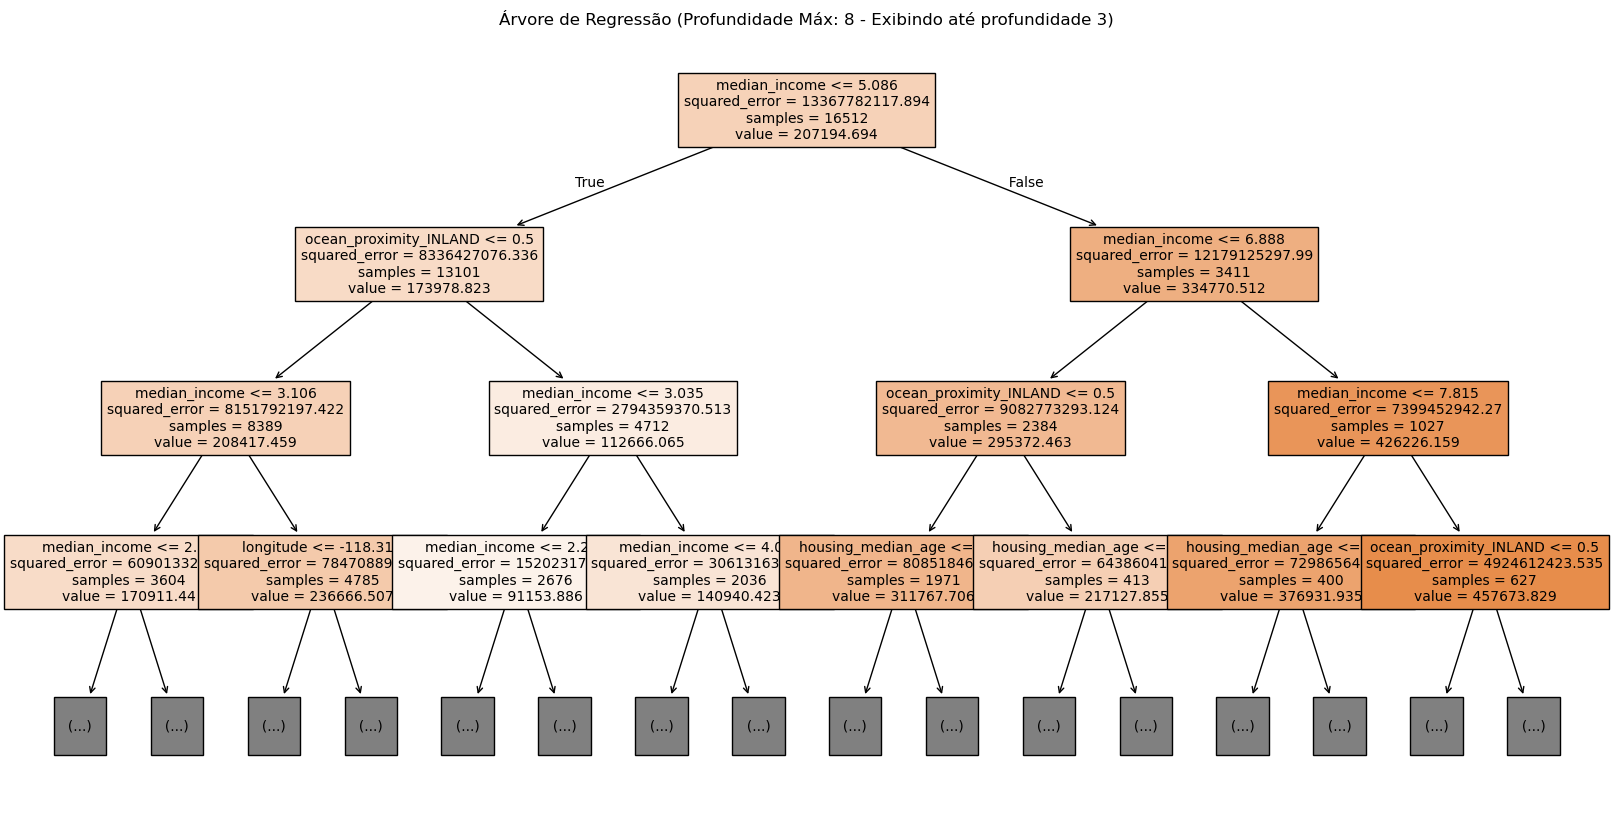

In [2]:
# 1. Carregar a base de dados
df = pd.read_csv('housing.csv')

# 2. Converter variáveis categóricas para numéricas
df = pd.get_dummies(df)

# 3. Separar variáveis preditoras (X) e alvo (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# 4. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Treinar duas árvores: uma profunda e uma rasa
arvore_profunda = DecisionTreeRegressor(max_depth=8, random_state=42)
arvore_profunda.fit(X_train, y_train)

arvore_rasa = DecisionTreeRegressor(max_depth=2, random_state=42)
arvore_rasa.fit(X_train, y_train)

# 6. Calcular o MSE de cada árvore
mse_treino_profunda = mean_squared_error(y_train, arvore_profunda.predict(X_train))
mse_teste_profunda = mean_squared_error(y_test, arvore_profunda.predict(X_test))

mse_treino_rasa = mean_squared_error(y_train, arvore_rasa.predict(X_train))
mse_teste_rasa = mean_squared_error(y_test, arvore_rasa.predict(X_test))

print(f"Árvore Profunda (max_depth=8)")
print(f"  MSE Treinamento: {mse_treino_profunda:.2f}")
print(f"  MSE Teste:       {mse_teste_profunda:.2f}")

print(f"\nÁrvore Rasa (max_depth=2)")
print(f"  MSE Treinamento: {mse_treino_rasa:.2f}")
print(f"  MSE Teste:       {mse_teste_rasa:.2f}")

# 7. Visualizar a árvore com melhor predição 
plt.figure(figsize=(20, 10))
plot_tree(arvore_profunda, filled=True, feature_names=X.columns, max_depth=3, fontsize=10)
plt.title("Árvore de Regressão (Profundidade Máx: 8 - Exibindo até profundidade 3)")
plt.show()

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [3]:
# Treinar árvore sem restrição para obter os valores de CCP Alpha
reg = DecisionTreeRegressor(random_state=42)
path = reg.cost_complexity_pruning_path(X_train, y_train)

# Extrair os alphas e a impureza total para cada possível poda
ccp_alphas = path.ccp_alphas
impurezas = path.impurities

# Exibir os primeiros valores como exemplo
for alpha, imp in zip(ccp_alphas[:5], impurezas[:5]):
    print(f"ccp_alpha = {alpha:.8f}, impureza_total = {imp:.8f}")

ccp_alpha = 0.00000000, impureza_total = 0.00000000
ccp_alpha = 0.00002523, impureza_total = 0.00005047
ccp_alpha = 0.00003028, impureza_total = 0.00008075
ccp_alpha = 0.00003028, impureza_total = 0.00011103
ccp_alpha = 0.00003028, impureza_total = 0.00014131


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [5]:
# 1. Calcular novamente os ccp_alphas
reg = DecisionTreeRegressor(random_state=42)
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# 2. Verificar o conteúdo de ccp_alphas
print("Shape de ccp_alphas:", ccp_alphas.shape)
print("Primeiros valores de ccp_alphas:", ccp_alphas[:10])

# 3. Remover o primeiro alpha (0.0) que representa a árvore sem poda
ccp_alphas = ccp_alphas[1:]

# 4. Limitar a quantidade de alphas, para evitar excesso de modelos e sobrecarga
ccp_alphas = ccp_alphas[:20]

# 5. Treinar uma árvore para cada alpha
arvores = []
for i, alpha in enumerate(ccp_alphas):
    print(f"Treinando árvore {i+1}/{len(ccp_alphas)} com alpha = {alpha:.8f}")
    modelo = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    modelo.fit(X_train, y_train)
    arvores.append(modelo)

print(f"\nForam treinadas {len(arvores)} árvores com diferentes valores de ccp_alpha.")

Shape de ccp_alphas: (14445,)
Primeiros valores de ccp_alphas: [0.00000000e+00 2.52335571e-05 3.02810078e-05 3.02810078e-05
 3.02810078e-05 4.03703645e-05 4.03703645e-05 4.03703645e-05
 4.03759091e-05 4.54215116e-05]
Treinando árvore 1/20 com alpha = 0.00002523
Treinando árvore 2/20 com alpha = 0.00003028
Treinando árvore 3/20 com alpha = 0.00003028
Treinando árvore 4/20 com alpha = 0.00003028
Treinando árvore 5/20 com alpha = 0.00004037
Treinando árvore 6/20 com alpha = 0.00004037
Treinando árvore 7/20 com alpha = 0.00004037
Treinando árvore 8/20 com alpha = 0.00004038
Treinando árvore 9/20 com alpha = 0.00004542
Treinando árvore 10/20 com alpha = 0.00004542
Treinando árvore 11/20 com alpha = 0.00004542
Treinando árvore 12/20 com alpha = 0.00005047
Treinando árvore 13/20 com alpha = 0.00005047
Treinando árvore 14/20 com alpha = 0.30281008
Treinando árvore 15/20 com alpha = 0.30281008
Treinando árvore 16/20 com alpha = 0.30281008
Treinando árvore 17/20 com alpha = 0.30281008
Treinando 

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [6]:
# Listas para armazenar os MSEs
mse_treino = []
mse_teste = []

# Calcular o MSE para cada árvore
for i, arvore in enumerate(arvores):
    y_pred_train = arvore.predict(X_train)
    y_pred_test = arvore.predict(X_test)
    
    mse_treino.append(mean_squared_error(y_train, y_pred_train))
    mse_teste.append(mean_squared_error(y_test, y_pred_test))
    
    print(f"Árvore {i+1}: alpha={ccp_alphas[i]:.8f} | MSE Treino = {mse_treino[-1]:.2f} | MSE Teste = {mse_teste[-1]:.2f}")


Árvore 1: alpha=0.00002523 | MSE Treino = 0.00 | MSE Teste = 4769742361.67
Árvore 2: alpha=0.00003028 | MSE Treino = 0.00 | MSE Teste = 4769742273.85
Árvore 3: alpha=0.00003028 | MSE Treino = 0.00 | MSE Teste = 4769742273.85
Árvore 4: alpha=0.00003028 | MSE Treino = 0.00 | MSE Teste = 4769742273.85
Árvore 5: alpha=0.00004037 | MSE Treino = 0.00 | MSE Teste = 4769742273.85
Árvore 6: alpha=0.00004037 | MSE Treino = 0.00 | MSE Teste = 4769742273.85
Árvore 7: alpha=0.00004037 | MSE Treino = 0.00 | MSE Teste = 4769742273.85
Árvore 8: alpha=0.00004038 | MSE Treino = 0.00 | MSE Teste = 4769742273.85
Árvore 9: alpha=0.00004542 | MSE Treino = 0.00 | MSE Teste = 4769742273.85
Árvore 10: alpha=0.00004542 | MSE Treino = 0.00 | MSE Teste = 4769742273.85
Árvore 11: alpha=0.00004542 | MSE Treino = 0.00 | MSE Teste = 4769742273.85
Árvore 12: alpha=0.00005047 | MSE Treino = 0.00 | MSE Teste = 4769742237.82
Árvore 13: alpha=0.00005047 | MSE Treino = 0.00 | MSE Teste = 4769742237.82
Árvore 14: alpha=0.30

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

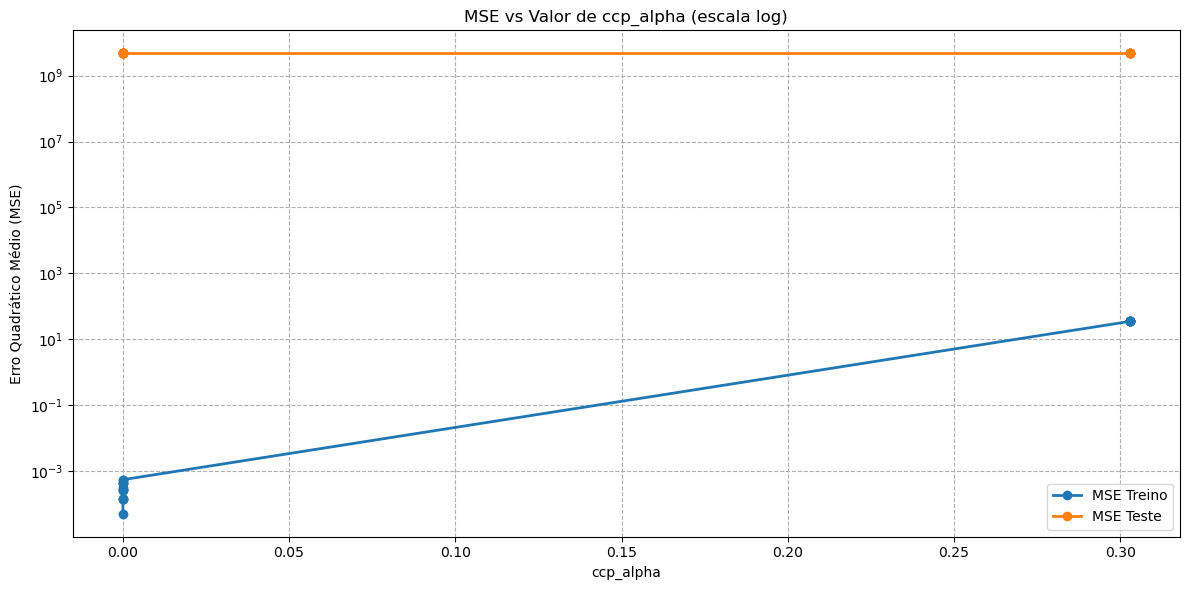

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(ccp_alphas, mse_treino, marker='o', label="MSE Treino", linewidth=2)
plt.plot(ccp_alphas, mse_teste, marker='o', label="MSE Teste", linewidth=2)

plt.xscale("linear")
plt.yscale("log")  # Escala logarítmica no eixo Y

plt.xlabel("ccp_alpha")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.title("MSE vs Valor de ccp_alpha (escala log)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [14]:
# Encontrar a árvore correspondente ao alpha escolhido
alpha_escolhido = 0.00005047
modelo_escolhido = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha_escolhido)
modelo_escolhido.fit(X_train, y_train)

# Predicoes
y_pred_train = modelo_escolhido.predict(X_train)
y_pred_test = modelo_escolhido.predict(X_test)

# Calcular R²
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Exibir os resultados
print(f"R² Treino: {r2_train:.4f}")
print(f"R² Teste: {r2_test:.4f}")


R² Treino: 1.0000
R² Teste: 0.6360


### 7. Visualize esta árvore.

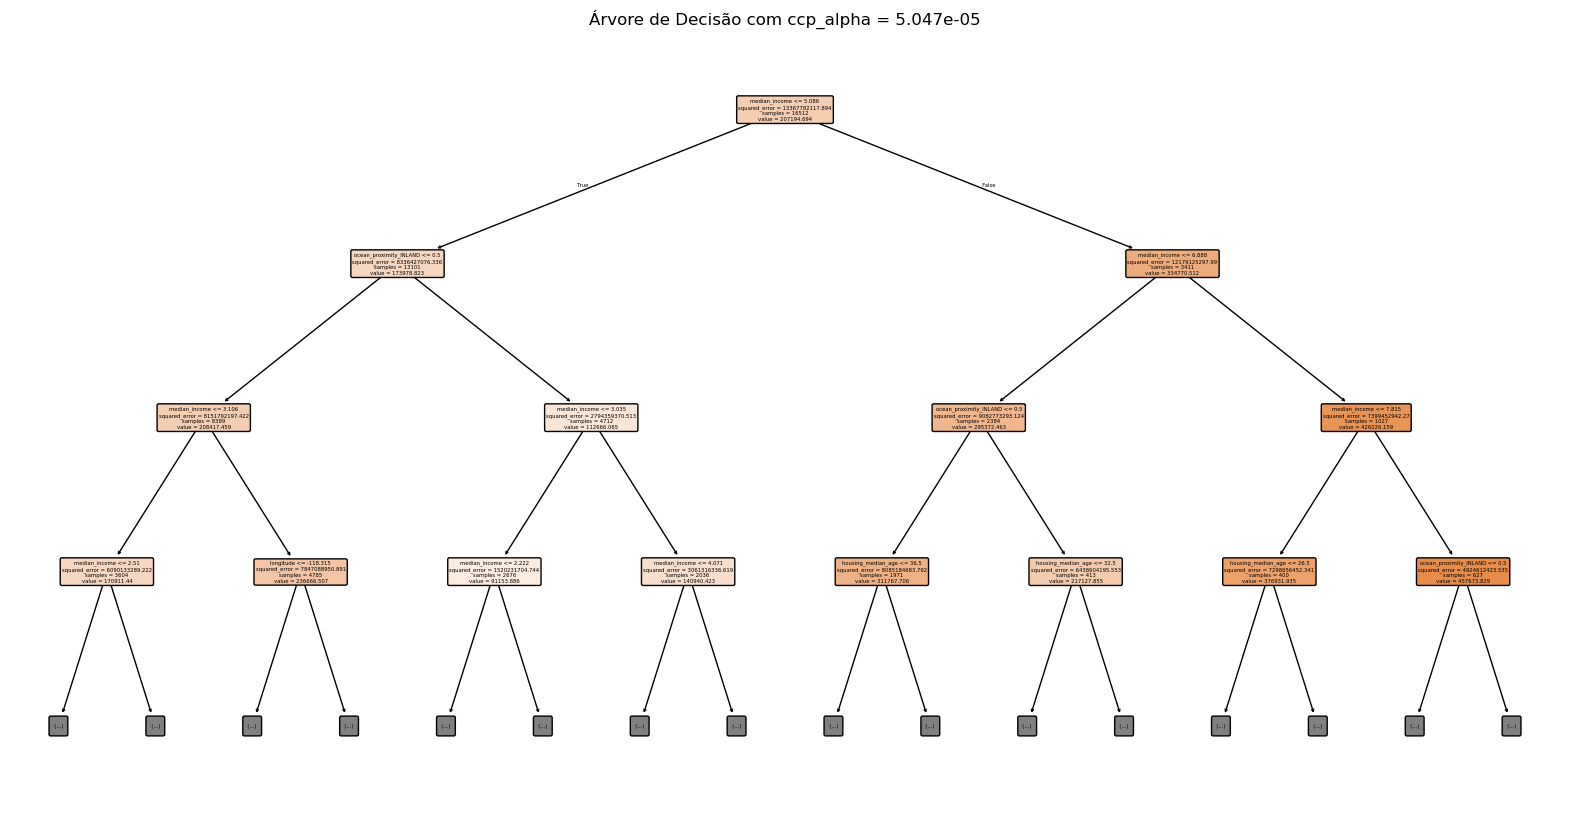

In [15]:
# Plotar a árvore
plt.figure(figsize=(20, 10))
plot_tree(modelo_escolhido, 
          feature_names=X_train.columns, 
          filled=True, 
          rounded=True, 
          max_depth=3)  
plt.title(f"Árvore de Decisão com ccp_alpha = {alpha_escolhido}")
plt.show()
